In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import random as rm
import numpy as np
from numpy.random import default_rng

rng = default_rng()

In [167]:
def str2int_arr(str):
    return np.array([float(i) for i in str], dtype="byte")

def graph_from_file(file):
    w = []
    with open(file, "r") as f:
        for line in f:
            arr = line.split()
            map(int, arr)
            w.append(str2int_arr(arr))
    return nx.from_numpy_matrix(np.array(w))

def graph_from_dimacs(file):
    G = nx.Graph()
    with open(file, "r") as f:
        for line in f:
            buff = line.split()
            if buff[0]=="p":
                G.add_nodes_from([i for i in range(1, int(buff[2])+1 )])
                break
        for line in f:
            edge = line.split()
            G.add_edge(int(edge[1]), int(edge[2]))
    return G

G = graph_from_file("graph_examples/34_14")

In [230]:
def f_activations(x):
    # Приведение к (1,0)
    return 1 / ( 1 + np.exp(x) )

def f_act01(x):
    return 1 if x > 0 else 0

def W_init(images):
    W = np.zeros((len(images[0]),len(images[0])))
    for X in images:
        arr_of_int = np.array(str2int_arr(X))
        W += np.outer(arr_of_int, arr_of_int)
    # порог?
    # деление? 
    return W

def energy(X, W, B=1):
    n = len(X)
    sum = 0
    for i in range(n):
        for j in range(n):
            sum += W[i, j]*X[i]*X[j]
    
    sum2 = 0
    for i in range(n):
        sum2 += X[i]# *h[i]?
    
    #return -0.5*sum - sum2*B#, sum//2, sum2
    n = sum2
    return (-n*(n-1)//2 + sum) * B + n
    
def multy_mutation(individual):
    num_mutation=5
    n = individual.size
    for i in range(num_mutation):
        individual[np.random.randint(0, n)] ^= 1
    return individual


C:\Users\arkad\AppData\Local\Temp\ipykernel_5552\1408479829.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


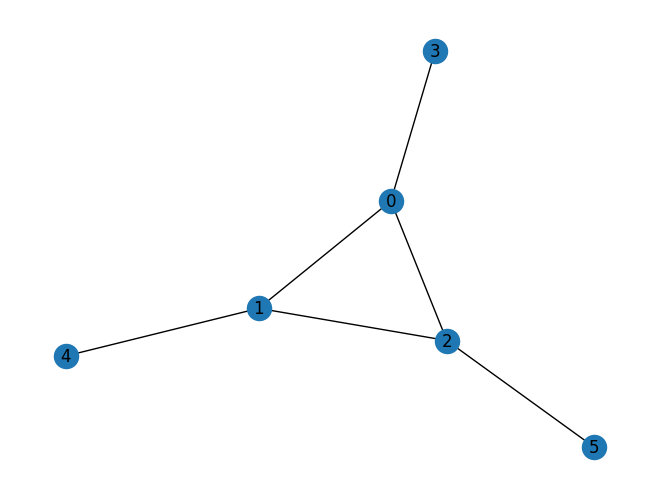

In [200]:
G = graph_from_file("graph_examples/6_3")
W = nx.adjacency_matrix(G).todense()
nx.draw(G, with_labels=True)

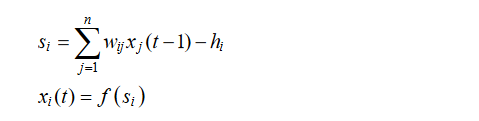

In [201]:
#----------Hyperparameters----------
max_iteration = 10000

mnitc = 1000  # maximum number of iterations without change
h_i = 1
#-----------#-----------#----------- 

X = "1"*G.number_of_nodes()
X = np.array(str2int_arr(X), dtype="byte")
X = multy_mutation(X)

iter_no_change = np.intc(0)

for iteration in range(max_iteration):
    
    i = rng.integers(G.number_of_nodes())  # num_update
    X_next = 0
    
    for j in range(G.number_of_nodes()):
        X_next += W[i, j]*X[j]
        
    X_next = f_act01(X_next - h_i)
    
    
    if X[i] == X_next:
        iter_no_change += 1
    else:
        iter_no_change = np.intc(0)
        X[i] = X_next
        print(X)
        
    if( iter_no_change>=mnitc): 
        break
    
    
print(X, iteration, sep="\n")

[1 1 1 0 0 1]
[1 1 1 0 0 0]
[1 1 1 0 0 0]
1012


In [164]:
energy(X, W)

(-0.0, 0.0, 0)

In [171]:
str2int_arr(format(64+3, "b"))[1:]

array([0, 0, 0, 0, 1, 1], dtype=int8)

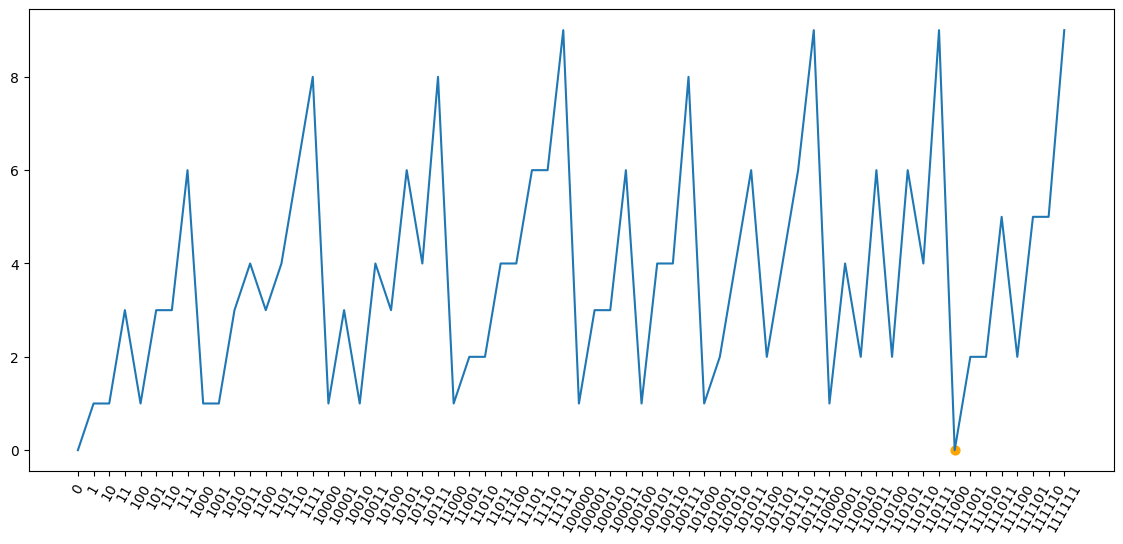

In [233]:
x = list(range(64))
y = list(range(64))
for i in range(64):
    x[i] = format(x[i], "b")
    y[i] = energy(str2int_arr(format(64+i, "b"))[1:], W, B=-1)

plt.figure(figsize=(14,6))
plt.xticks(rotation=60)
plt.plot(x, y)

plt.scatter(x[56], y[56], color='orange', s=40, marker='o')
